In [1]:
import pandas as pd
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(X_train , Y_train ),(X_test , Y_test) = keras.datasets.cifar10.load_data()


([], <a list of 0 Text major ticklabel objects>)

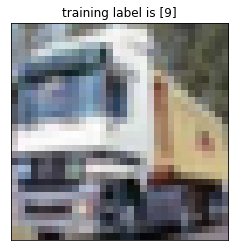

In [3]:
plt.imshow(X_train[1])  
plt.title("training label is " + str(Y_train[1]))
plt.xticks([])
plt.yticks([])

In [4]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train = X_train / 255
X_test = X_test / 255

In [5]:
num_classes = 10 
Y_train = keras.utils.to_categorical(Y_train,num_classes)
Y_test = keras.utils.to_categorical(Y_test,num_classes)


In [6]:
model = Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(Dense(units=1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=512, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 1024)              3146752   
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 3,738,506
Trainable params: 3,738,506
Non-trainable params: 0
______________________________________________

In [7]:
datagen = ImageDataGenerator( 
         rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True) 
datagen.fit(X_train)

In [8]:
model.compile(

  optimizer='sgd',

  loss='categorical_crossentropy',

  metrics=['accuracy']

)
X_valid, X_train = X_train[:5000], X_train[5000:]
Y_valid, Y_train = Y_train[:5000], Y_train[5000:]



In [19]:
r = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=128),\
                    steps_per_epoch=X_train.shape[0] // 128,epochs=50,\
                    verbose=1,validation_data=(X_valid,Y_valid))


Epoch 1/50
351/351 [==============================] - 38s 109ms/step - loss: 0.9738 - accuracy: 0.6508 - val_loss: 0.9965 - val_accuracy: 0.6558
Epoch 2/50
351/351 [==============================] - 37s 105ms/step - loss: 0.9773 - accuracy: 0.6513 - val_loss: 0.9971 - val_accuracy: 0.6550
Epoch 3/50
351/351 [==============================] - 37s 107ms/step - loss: 0.9722 - accuracy: 0.6531 - val_loss: 1.0116 - val_accuracy: 0.6486
Epoch 4/50
351/351 [==============================] - 38s 108ms/step - loss: 0.9699 - accuracy: 0.6532 - val_loss: 1.0155 - val_accuracy: 0.6496
Epoch 5/50
351/351 [==============================] - 38s 107ms/step - loss: 0.9701 - accuracy: 0.6541 - val_loss: 1.0072 - val_accuracy: 0.6490
Epoch 6/50
351/351 [==============================] - 38s 109ms/step - loss: 0.9686 - accuracy: 0.6541 - val_loss: 1.0074 - val_accuracy: 0.6542
Epoch 7/50
351/351 [==============================] - 37s 106ms/step - loss: 0.9705 - accuracy: 0.6540 - val_loss: 0.9937 - val_ac

Text(0.5, 1.0, 'Accuracy evolution')

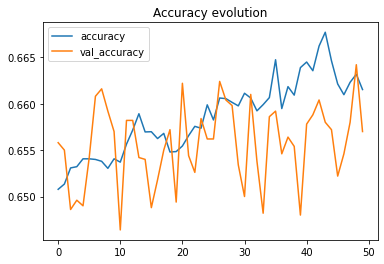

In [20]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.title('Accuracy evolution')


In [21]:
test_loss, test_acc = model.evaluate(X_test,  Y_test, verbose=2)

313/313 - 2s - loss: 1.0383 - accuracy: 0.6407


In [31]:
X_pred = X_test[0].reshape(1,3072)

In [32]:
model.predict(X_pred)

array([[3.3760630e-03, 1.6296368e-02, 2.7842209e-02, 5.4901963e-01,
        1.5505522e-01, 1.3443111e-01, 1.7838420e-04, 3.6694114e-03,
        8.7305196e-02, 2.2826478e-02]], dtype=float32)